In [1]:
from explainerdashboard import ClassifierExplainer, RegressionExplainer, ExplainerHub,ExplainerDashboard
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pickle 
from os import path

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`


In [2]:
#Obtención datasets
df_train = pd.read_csv('./datasets/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv') # ,sep=';')
df_test = pd.read_csv('./datasets/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv') # ,sep=';')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [4]:
df_train['service'].replace('-',np.nan,inplace=True)
df_test['service'].replace('-',np.nan,inplace=True)

In [5]:
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)

In [6]:
df_features = pd.read_csv('./datasets/UNSW-NB15 - CSV Files/UNSW-NB15_features.csv', encoding='cp1252')

In [7]:
df_features['Type '] = df_features['Type '].str.lower()

In [8]:
# selecting column names of all data types
nominal_names = df_features['Name'][df_features['Type ']=='nominal']
integer_names = df_features['Name'][df_features['Type ']=='integer']
binary_names = df_features['Name'][df_features['Type ']=='binary']
float_names = df_features['Name'][df_features['Type ']=='float']

In [9]:
# selecting common column names from dataset and feature dataset
cols = df_train.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [10]:
# Converting integer columns to numeric
for c in integer_names:
    pd.to_numeric(df_train[c])

# Converting binary columns to numeric
for c in binary_names:
    pd.to_numeric(df_train[c])

# Converting float columns to numeric
for c in float_names:
    pd.to_numeric(df_train[c])

In [11]:
# selecting common column names from dataset and feature dataset
cols = df_test.columns
nominal_names = cols.intersection(nominal_names)
integer_names = cols.intersection(integer_names)
binary_names = cols.intersection(binary_names)
float_names = cols.intersection(float_names)

In [12]:
# Converting integer columns to numeric
for c in integer_names:
    pd.to_numeric(df_test[c])

# Converting binary columns to numeric
for c in binary_names:
    pd.to_numeric(df_test[c])

# Converting float columns to numeric
for c in float_names:
    pd.to_numeric(df_test[c])

In [13]:
#Codificación categoricos
num_col = df_train.select_dtypes(include='number').columns

# selecting categorical data attributes
cat_col = df_train.columns.difference(num_col)
cat_col = cat_col[1:]
cat_col

Index(['proto', 'service', 'state'], dtype='object')

In [14]:
# creating a dataframe with only categorical attributes
data_cat = df_train[cat_col].copy()

In [15]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [16]:
df_train = pd.concat([df_train, data_cat],axis=1)

In [17]:
df_train.drop(columns=cat_col,inplace=True)

In [18]:
# creating a dataframe with only categorical attributes
data_cat = df_test[cat_col].copy()

In [19]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [20]:
df_test = pd.concat([df_test, data_cat],axis=1)

In [21]:
df_test.drop(columns=cat_col,inplace=True)

In [22]:
df_train.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label',
       'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'state_ACC', 'state_CON', 'state_FIN', 'state_INT',
       'state_REQ'],
      dtype='object')

# Division X e Y

In [23]:
#sport, dsport, proto, dur, sbytes, dbytes, service, Spkts y Dpkts

X_train = df_train[[ 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'state_CON', 'state_FIN', 'state_INT',
       'state_REQ']]
X_test = df_test[[ 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'state_CON', 'state_FIN', 'state_INT',
       'state_REQ']]
Y_train = df_train[['label']]
Y_test = df_test[['label']]

# Correlations

In [24]:
corr_bin = Y_train.reset_index(drop=True)

In [25]:
corr_bin = pd.concat([X_train, corr_bin], axis=1)

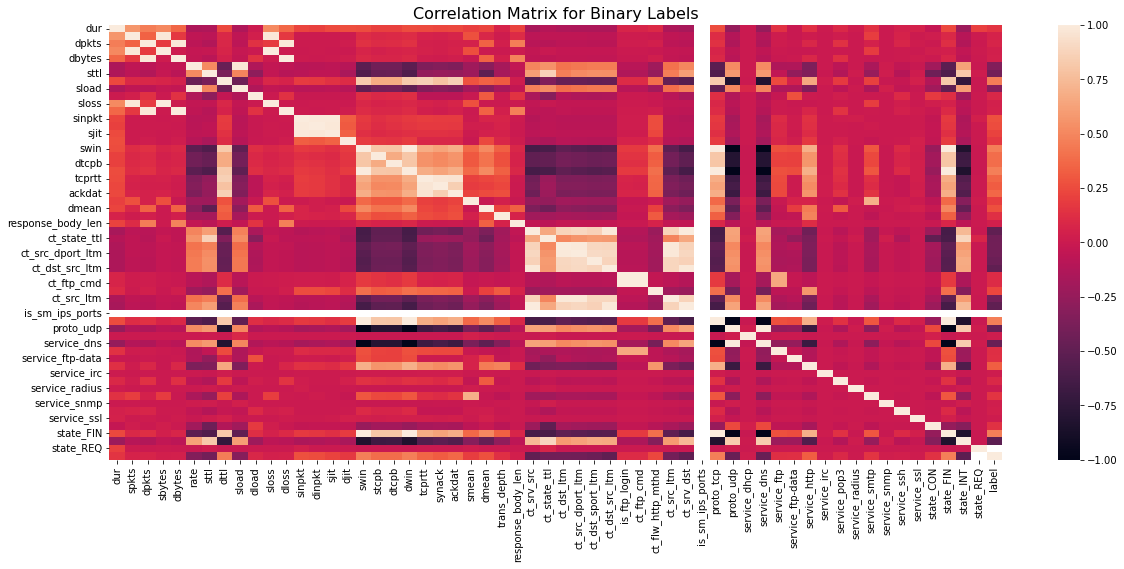

In [26]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(20,8))
corr_bin = corr_bin.corr()
sns.heatmap(corr_bin,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Binary Labels',fontsize=16)
plt.show()

In [27]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ybin = abs(corr_bin['label'])
highest_corr_bin = corr_ybin[corr_ybin >0.40]
highest_corr_bin.sort_values(ascending=True)

ct_src_ltm          0.408457
sttl                0.413336
ct_dst_ltm          0.415487
ct_src_dport_ltm    0.422043
ct_state_ttl        0.424060
ct_dst_sport_ltm    0.452523
dttl                0.454948
state_FIN           0.464529
dwin                0.465880
proto_tcp           0.465955
proto_udp           0.465955
swin                0.465955
service_dns         0.467535
ct_dst_src_ltm      0.504283
ct_srv_src          0.505962
ct_srv_dst          0.506790
state_INT           0.522398
label               1.000000
Name: label, dtype: float64

## Binario - Elección y balanceo

In [28]:
bin_cols = highest_corr_bin.index
bin_cols = bin_cols.drop('label')

In [29]:
X_train = X_train[bin_cols]
X_test = X_test[bin_cols]

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

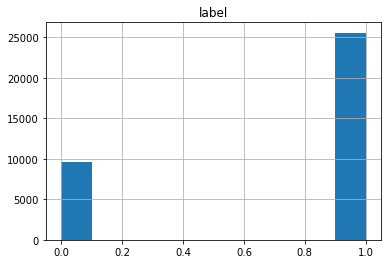

In [30]:
Y_train.hist()

In [31]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)
X_test, Y_test = sm.fit_resample(X_test, Y_test)

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

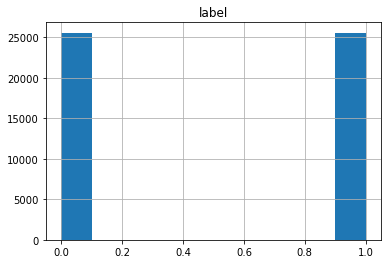

In [32]:
Y_train.hist()

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv =  KFold(n_splits=5, shuffle=True,random_state=33)

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import xgboost as xgb
model = xgb.XGBClassifier(objective='binary:logistic',
                              max_depth=4,
                              booster='gbtree',
                              eval_metric='error',
                              eta=0.01,
                              n_estimators=15,
                              use_label_encoder=False)
model.fit(X_train, Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train, cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test, cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.96761774 0.96859042 0.96709086 0.96798249 0.97021156]
Accuracy: 0.97 (+/- 0.00)


In [35]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average='macro')

0.9632187080913042

In [36]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average='macro')

0.9632244467860906

In [37]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average='macro')

0.9635137203414597

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


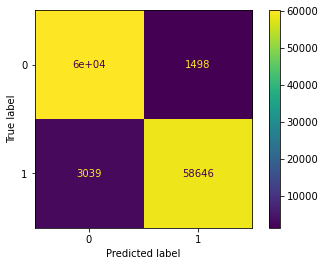

In [38]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


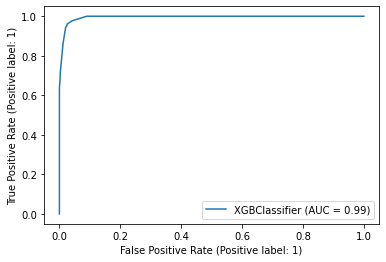

In [39]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

In [40]:
from joblib import dump, load
import shap

In [41]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#XGB_explainer = ClassifierExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.TreeExplainer(model)
dump(explainer, "./app/saves/binary/explainers/XGB_explainer.joblib")
dump(model, './app/saves/binary/models/XGB.joblib') 

['./app/saves/binary/models/XGB.joblib']

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


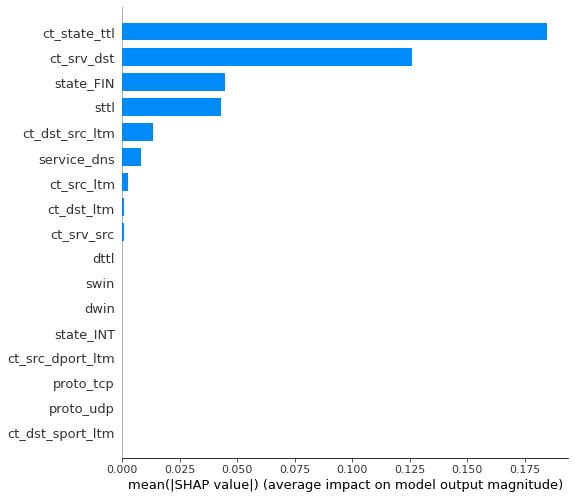

In [42]:
#Importancias características del modelo
shap_values = explainer.shap_values(X_test[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [43]:
model = LinearRegression()
model.fit(X_train, Y_train.values.ravel())
"""y_pred = model.predict(X_test)
round = lambda x:1 if x>0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)
scores = cross_val_score(model, X_train, Y_train, cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test, cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.85657591 0.85906986 0.85333667 0.85588388 0.8613848 ]
Accuracy: 0.86 (+/- 0.01)


In [44]:
y_pred = model.predict(X_test)
round = lambda x:1 if x>0.6 else 0
vfunc = np.vectorize(round)
y_pred = vfunc(y_pred)
from sklearn.metrics import f1_score
f1_score(Y_test,y_pred, average='macro')


0.8692468361791594

In [45]:
from sklearn.metrics import recall_score
recall_score(Y_test, y_pred, average='macro')

0.8704142011834319

In [46]:
from sklearn.metrics import precision_score
precision_score(Y_test, y_pred, average='macro')

0.8841323443693325

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[59520,  2165],
       [13822, 47863]], dtype=int64)

In [48]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#LR_explainer = RegressionExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.Explainer(model, X_train)
dump(explainer, "./app/saves/binary/explainers/LR_explainer.joblib")
dump(model, './app/saves/binary/models/LR.joblib') 

['./app/saves/binary/models/LR.joblib']

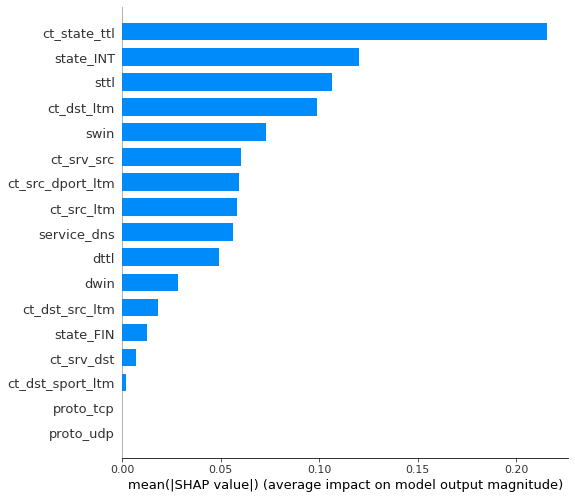

In [49]:
#Importancias características del modelo
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [50]:
model = LogisticRegression(random_state=123, max_iter=5000)
model.fit(X_train, Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.96206533 0.96210586 0.96060631 0.96121423 0.96303802]
Accuracy: 0.96 (+/- 0.00)


In [51]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average='macro')

0.9574045456604474

In [52]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average='macro')

0.957404555402448

In [53]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average='macro')

0.9574049738545636

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


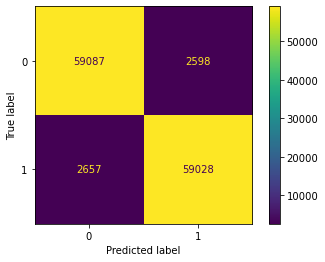

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


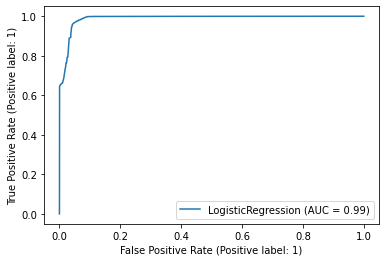

In [55]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

In [56]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#LogR_explainer = RegressionExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.Explainer(model, X_test)
dump(explainer, "./app/saves/binary/explainers/LogR_explainer.joblib")
dump(model, './app/saves/binary/models/LogR.joblib') 

['./app/saves/binary/models/LogR.joblib']

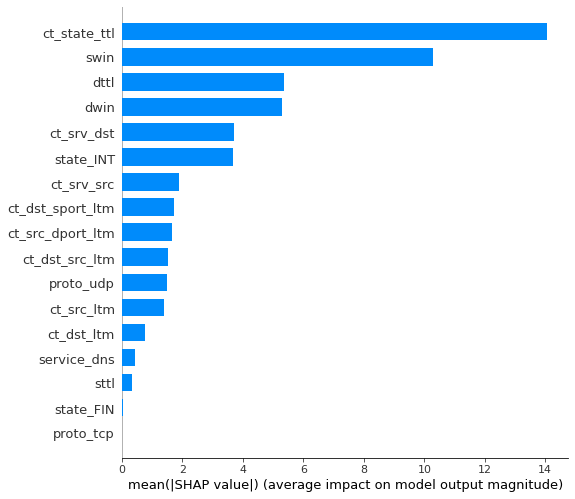

In [57]:
#Importancias características del modelo
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [58]:
model = RandomForestClassifier(random_state=123)
model.fit(X_train, Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.97839831 0.97673665 0.97637189 0.97815514 0.97803356]
Accuracy: 0.98 (+/- 0.00)


In [59]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average='macro')

0.9623878656416793

In [60]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average='macro')

0.9623895598605821

In [61]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average='macro')

0.962472887257013

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


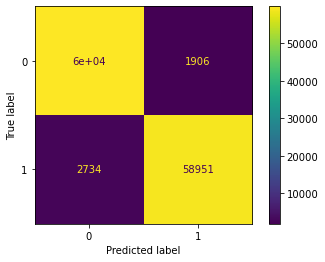

In [62]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


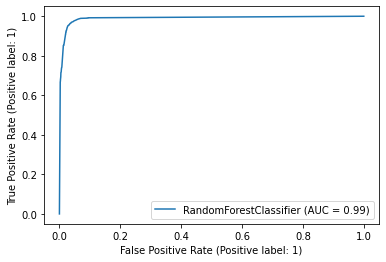

In [63]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

In [64]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#RF_explainer = ClassifierExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.TreeExplainer(model)
dump(explainer, "./app/saves/binary/explainers/RF_explainer.joblib")
dump(model, './app/saves/binary/models/RF.joblib') 

['./app/saves/binary/models/RF.joblib']

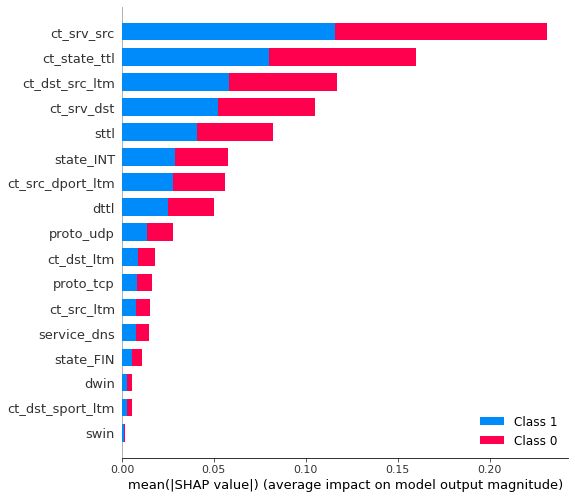

In [65]:
#Importancias características del modelo
shap_values = explainer.shap_values(X_train[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [66]:
model = DecisionTreeClassifier(max_depth=25,random_state=123)
model.fit(X_train, Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train, cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test, cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.97746616 0.97641242 0.97600713 0.97754722 0.97734457]
Accuracy: 0.98 (+/- 0.00)


In [67]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average='macro')

0.9601911697798415

In [68]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average='macro')

0.9601929156196807

In [69]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average='macro')

0.9602736579157468

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


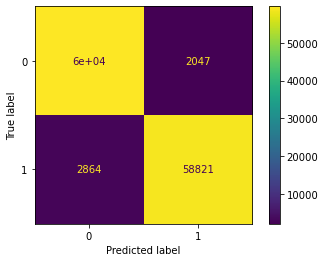

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


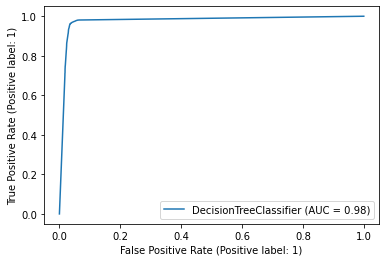

In [71]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

In [72]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#DT_explainer = ClassifierExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.TreeExplainer(model)
dump(explainer, "./app/saves/binary/explainers/DT_explainer.joblib")
dump(model, './app/saves/binary/models/DT.joblib') 

['./app/saves/binary/models/DT.joblib']

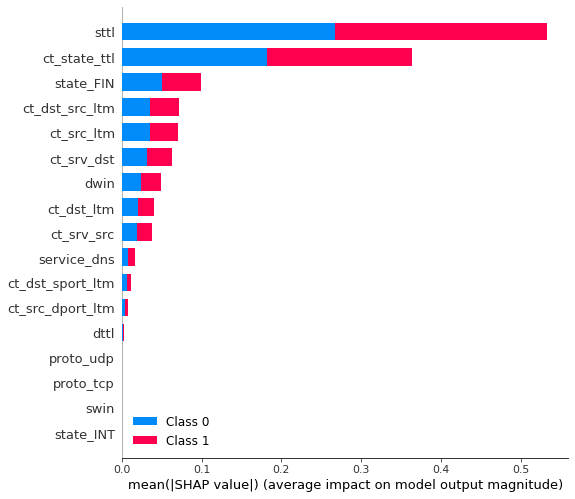

In [73]:
#Importancias características del modelo
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [74]:
model = MLPClassifier(random_state=123, solver='adam', max_iter=8000)
model.fit(X_train, Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.97077896 0.97252168 0.9701305  0.97203534 0.9654292 ]
Accuracy: 0.97 (+/- 0.01)


In [75]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average='macro')

0.9622071789279667

In [76]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average='macro')

0.962211234497852

In [77]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average='macro')

0.9624097203354502

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


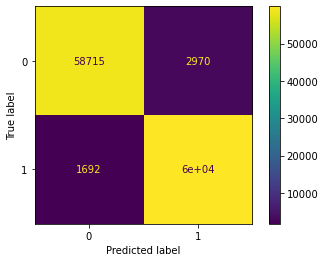

In [78]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.


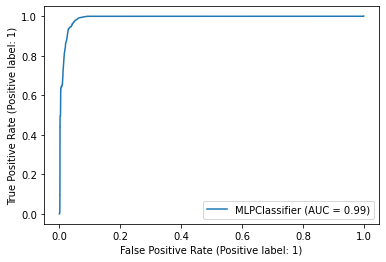

In [79]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model,X_test,Y_test)

In [80]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#MLP_explainer = ClassifierExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.KernelExplainer(model.predict_proba,shap.kmeans(X_train, 50))
dump(explainer, "./app/saves/binary/explainers/MLP_explainer.joblib")
dump(model, './app/saves/binary/models/MLP.joblib') 

X does not have valid feature names, but MLPClassifier was fitted with feature names


['./app/saves/binary/models/MLP.joblib']

  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

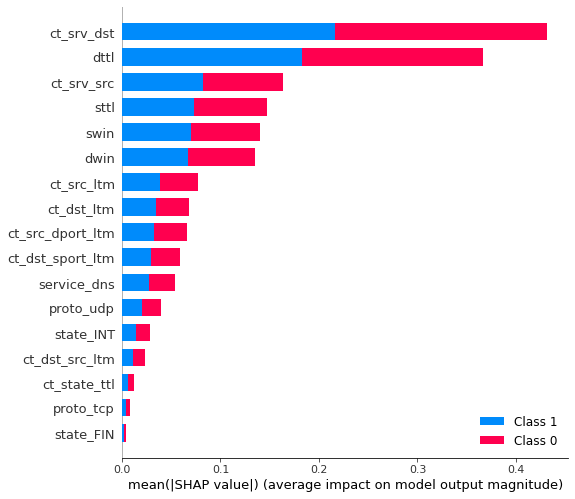

In [81]:
#Importancias características del modelo
from ipywidgets import IntProgress
shap_values = explainer.shap_values(X_test[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [82]:
#hub = ExplainerHub([ExplainerDashboard(XGB_explainer,title="Model One", name="XGB_explainer",description="This is model option one", mode='jupyterlab', shap_interaction=False),
 #                   ExplainerDashboard(LR_explainer,title="Model Two", name="LR_explainer",description="This is model option two", mode='jupyterlab', shap_interaction=False),
  #                  ExplainerDashboard(LogR_explainer,title="Model Three", name="LogR_explainer",description="This is model option three", mode='jupyterlab', shap_interaction=False),
   #                 ExplainerDashboard(RF_explainer,title="Model Four", name="RF_explainer",description="This is model option four", mode='jupyterlab', shap_interaction=False),
    #                ExplainerDashboard(DT_explainer,title="Model Five", name="DT_explainer",description="This is model option five", mode='jupyterlab', shap_interaction=False),
     #               ExplainerDashboard(MLP_explainer,title="Model Six", name="MLP_explainer",description="This is model option six", mode='jupyterlab', shap_interaction=False)])
#hub.run()

# Multiclass

In [83]:
df_train = df_train.drop(df_train[df_train['attack_cat']=='Normal'].index)
df_test = df_test.drop(df_test[df_test['attack_cat']=='Normal'].index)

In [84]:
df_analysis = df_test[df_test['attack_cat'] == 'Analysis']

In [85]:
df_analysis = df_analysis.reset_index(drop=True)

In [86]:
df_analysis

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,49179,0.679395,10,10,818,1206,27.966057,62,252,8678.309570,...,0,0,0,0,0,0,1,0,0,0
1,49181,0.566906,10,10,826,1146,33.515258,62,252,10499.095700,...,0,0,0,0,0,0,1,0,0,0
2,49191,0.906794,10,8,826,1088,18.747367,62,252,6563.784180,...,0,0,0,0,0,0,1,0,0,0
3,49194,0.723965,10,8,798,1212,23.481799,62,252,7945.135742,...,0,0,0,0,0,0,1,0,0,0
4,49195,0.963910,10,8,820,1086,17.636502,62,252,6125.053223,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,172338,0.409460,10,8,828,1214,41.518096,62,252,14575.293950,...,0,0,0,0,0,0,1,0,0,0
560,172343,0.881369,10,10,818,1308,21.557373,62,252,6689.593262,...,0,0,0,0,0,0,1,0,0,0
561,172393,0.551735,10,8,822,1086,30.811894,62,252,10729.789060,...,0,0,0,0,0,0,1,0,0,0
562,172407,0.707922,10,8,808,1266,24.013946,62,252,8226.895508,...,0,0,0,0,0,0,1,0,0,0


In [87]:
df_train = pd.concat([df_train, df_analysis], axis=0)

In [88]:
attack_cat_encoder_train = preprocessing.LabelEncoder().fit(df_train.attack_cat.unique())
attack_cat_encoder_test = preprocessing.LabelEncoder().fit(df_test.attack_cat.unique())

In [89]:
for i in range(len(attack_cat_encoder_test.classes_)):
    print(f"""{attack_cat_encoder_test.classes_[i]} encoded as {i}""") 
for i in range(len(attack_cat_encoder_train.classes_)):
    print(f"""{attack_cat_encoder_train.classes_[i]} encoded as {i}""") 

Analysis encoded as 0
Backdoor encoded as 1
DoS encoded as 2
Exploits encoded as 3
Fuzzers encoded as 4
Generic encoded as 5
Reconnaissance encoded as 6
Worms encoded as 7
Analysis encoded as 0
Backdoor encoded as 1
DoS encoded as 2
Exploits encoded as 3
Fuzzers encoded as 4
Generic encoded as 5
Reconnaissance encoded as 6
Worms encoded as 7


In [90]:
X_train = df_train[['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'state_CON', 'state_FIN', 'state_INT',
       'state_REQ']]
X_test = df_test[['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp',
       'service_ftp-data', 'service_http', 'service_irc', 'service_pop3',
       'service_radius', 'service_smtp', 'service_snmp', 'service_ssh',
       'service_ssl', 'state_CON', 'state_FIN', 'state_INT',
       'state_REQ']]
Y_train = df_train[['attack_cat']]
Y_test = df_test[['attack_cat']]
Y_train.attack_cat = pd.Series(attack_cat_encoder_train.transform(Y_train.attack_cat.values), index = Y_train.index)
Y_test.attack_cat = pd.Series(attack_cat_encoder_test.transform(Y_test.attack_cat.values), index = Y_test.index)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


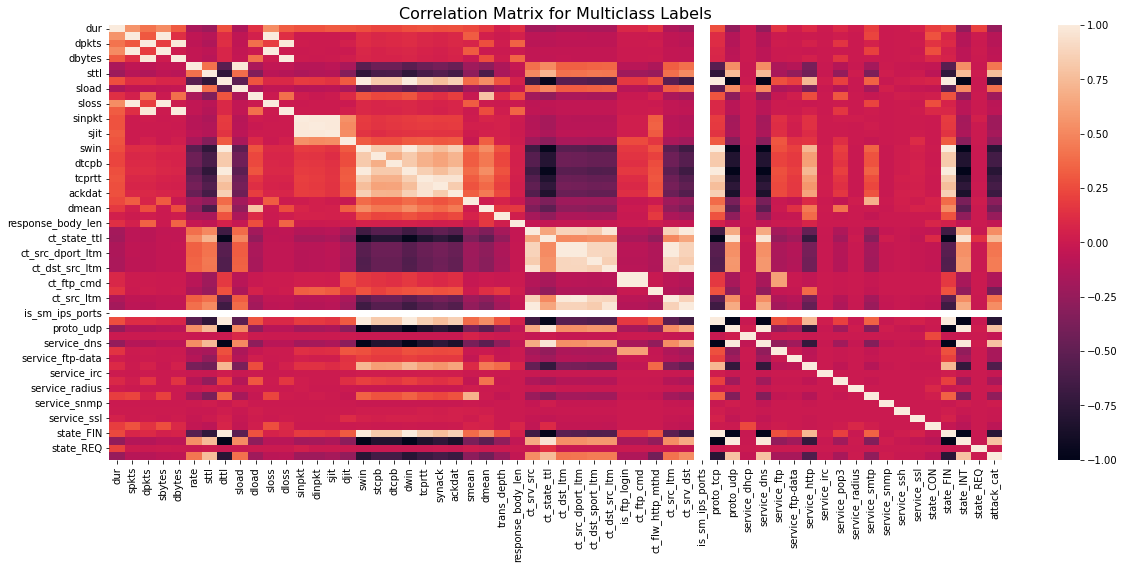

In [91]:
corr_mult = Y_train.reset_index(drop=True)
X_train = X_train.reset_index(drop=True)
corr_mult = pd.concat([X_train, corr_mult], axis=1)
# Correlation Matrix for Multiclass Labels
plt.figure(figsize=(20,8))
corr_mult = corr_mult.corr()
sns.heatmap(corr_mult,vmax=1.0,annot=False)
plt.title('Correlation Matrix for Multiclass Labels',fontsize=16)
plt.show()

In [92]:
# finding the attributes which have more than 0.3 correlation with encoded attack label attribute 
corr_ymult = abs(corr_mult['attack_cat'])
highest_corr_mult = corr_ymult[corr_ymult >0.25]
highest_corr_mult.sort_values(ascending=True)

djit                0.259692
service_smtp        0.273923
smean               0.290682
sload               0.404768
ct_flw_http_mthd    0.408658
ct_src_ltm          0.412705
ct_dst_ltm          0.420037
dmean               0.422224
rate                0.424417
ct_src_dport_ltm    0.429059
ct_dst_src_ltm      0.449006
ct_dst_sport_ltm    0.452837
ct_srv_src          0.526549
ct_srv_dst          0.528058
service_http        0.584757
synack              0.634961
dtcpb               0.642673
stcpb               0.645896
ackdat              0.691083
tcprtt              0.691827
ct_state_ttl        0.757543
sttl                0.762274
state_FIN           0.780933
service_dns         0.782171
dwin                0.782865
swin                0.782865
proto_udp           0.782865
proto_tcp           0.782865
dttl                0.786820
state_INT           0.787624
attack_cat          1.000000
Name: attack_cat, dtype: float64

array([[<AxesSubplot:title={'center':'attack_cat'}>]], dtype=object)

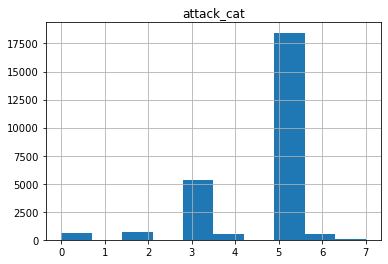

In [93]:
multi_cols = highest_corr_mult.index
multi_cols = multi_cols.drop('attack_cat')
X_train = X_train[multi_cols]
X_test = X_test[multi_cols]
Y_train.hist()


array([[<AxesSubplot:title={'center':'attack_cat'}>]], dtype=object)

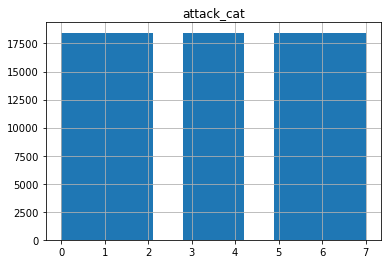

In [94]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, Y_train = sm.fit_resample(X_train, Y_train)
Y_train.hist()

In [95]:
from joblib import dump, load
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [96]:
model = xgb.XGBClassifier(objective='multi:softmax',
                              max_depth=6,
                              n_estimators=15,
                              eval_metric='merror',
                              eta=0.01,
                              use_label_encoder=False)
model.fit(X_train, Y_train.values.ravel())

"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.93637027 0.93345222 0.93296588 0.92956148 0.93547864]
Accuracy: 0.93 (+/- 0.00)


In [97]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average=None)

array([0.55193176, 0.01837928, 0.27496237, 0.74013982, 0.79424084,
       0.99447233, 0.60561709, 0.10565635])

In [98]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average=None)

array([0.9751773 , 0.11111111, 0.30597432, 0.61154012, 0.87637204,
       0.99073324, 0.89900176, 0.86842105])

In [99]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average=None)

array([0.38488453, 0.01001821, 0.24965831, 0.9372278 , 0.72618478,
       0.99823975, 0.45660602, 0.05625   ])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


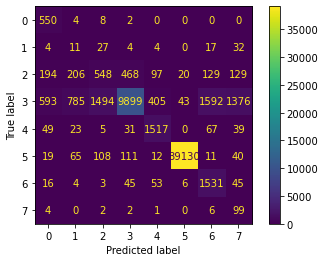

In [100]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

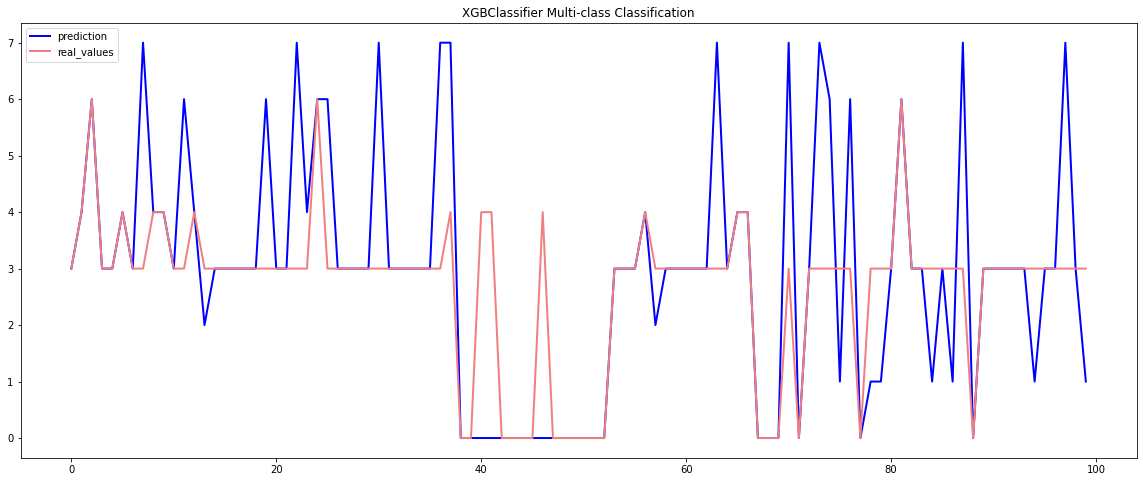

In [101]:
y_pred = model.predict(X_test)
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("XGBClassifier Multi-class Classification")
plt.show()

In [102]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#XGB_explainer = ClassifierExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.TreeExplainer(model)
dump(explainer, "./app/saves/multiclass/explainers/XGB_explainer.joblib")
dump(model, './app/saves/multiclass/models/XGB.joblib') 

['./app/saves/multiclass/models/XGB.joblib']

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


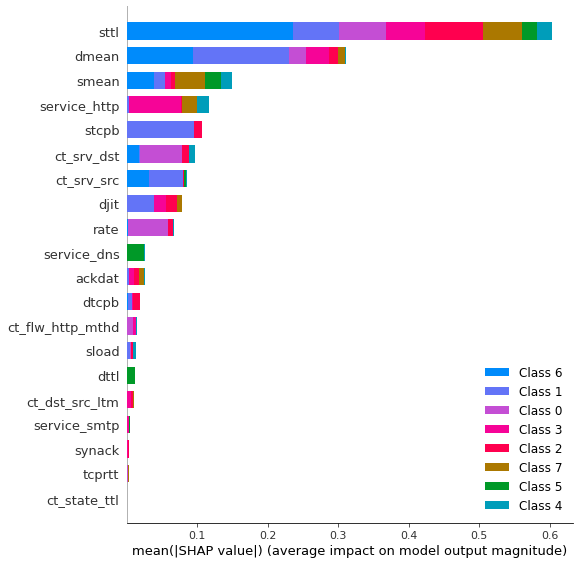

In [103]:
shap_values = explainer.shap_values(X_test[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [104]:
model = DecisionTreeClassifier(random_state=123)
model.fit(X_train, Y_train.values.ravel())

"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.91951042 0.91951042 0.9187809  0.91343114 0.92137473]
Accuracy: 0.92 (+/- 0.01)


In [105]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average=None)

array([0.69075321, 0.02531646, 0.27806563, 0.81251867, 0.73690476,
       0.99212838, 0.51407767, 0.30188679])

In [106]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average=None)

array([1.        , 0.02020202, 0.35957566, 0.75622413, 0.71519353,
       0.99245493, 0.62184381, 0.42105263])

In [107]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average=None)

array([0.52759588, 0.03389831, 0.22668075, 0.87786862, 0.75997545,
       0.99180203, 0.43814646, 0.23529412])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


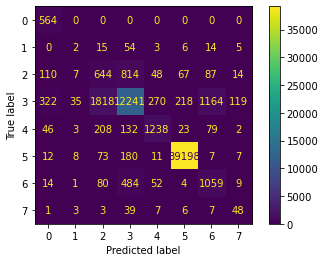

In [108]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

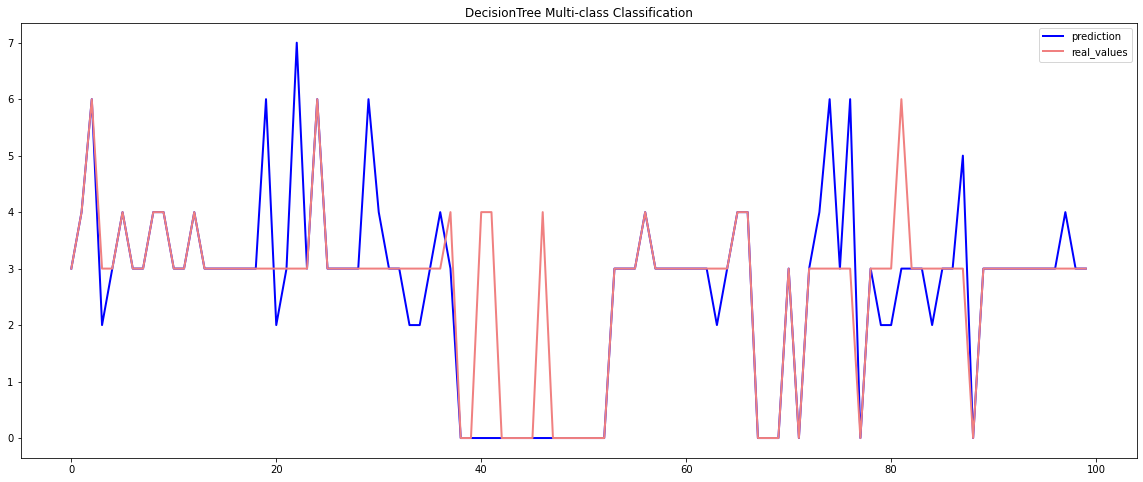

In [109]:
y_pred = model.predict(X_test)
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("DecisionTree Multi-class Classification")
plt.show()

In [110]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#XGB_explainer = ClassifierExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.TreeExplainer(model)
dump(explainer, "./app/saves/multiclass/explainers/DT_explainer.joblib")
dump(model, './app/saves/multiclass/models/DT.joblib') 

['./app/saves/multiclass/models/DT.joblib']

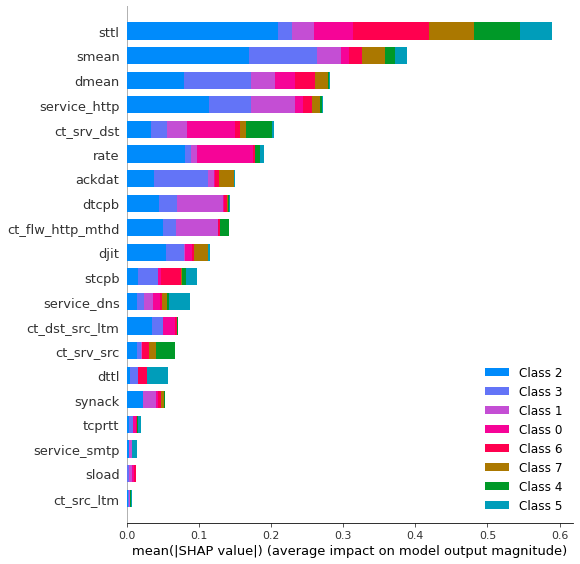

In [111]:
shap_values = explainer.shap_values(X_test[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [112]:
model = LinearRegression()
model.fit(X_train, Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.71762416 0.71032615 0.71504731 0.6929607  0.72422315]
Accuracy: 0.71 (+/- 0.02)


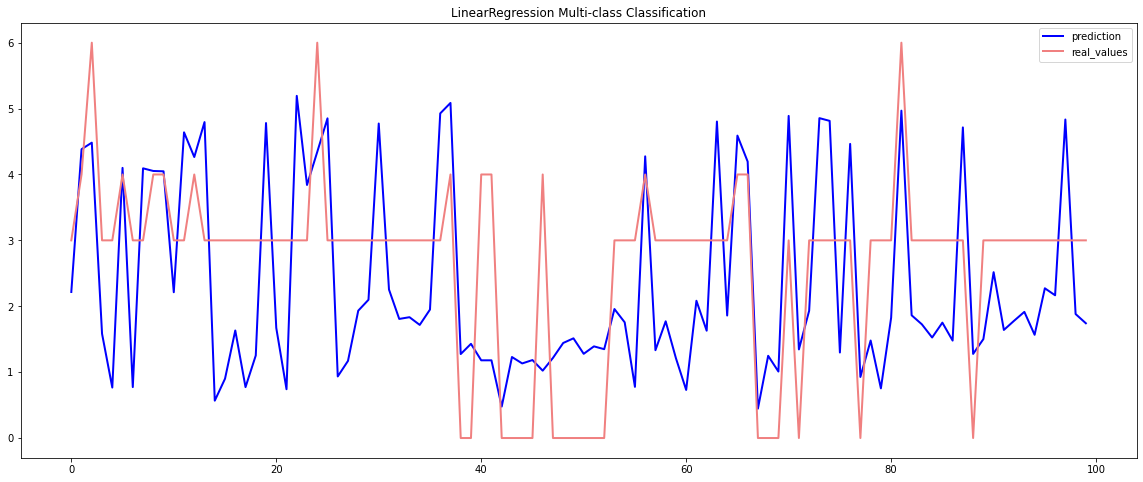

In [113]:
y_pred = model.predict(X_test)
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("LinearRegression Multi-class Classification")
plt.show()

In [114]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#LR_explainer = RegressionExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.Explainer(model, X_train)
dump(explainer, "./app/saves/multiclass/explainers/LR_explainer.joblib")
dump(model, './app/saves/multiclass/models/LR.joblib')

['./app/saves/multiclass/models/LR.joblib']

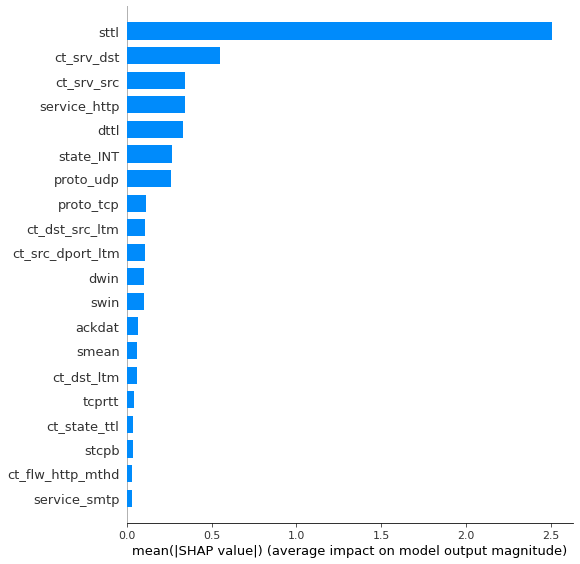

In [115]:
shap_values = explainer.shap_values(X_test[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [116]:
model = LogisticRegression(random_state=123, max_iter=400,multi_class='multinomial')
model.fit(X_train,Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

[VALIDATE] Scores in every iteration [0.89543649 0.89527438 0.89170787 0.88522331 0.89624706]
Accuracy: 0.89 (+/- 0.01)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [117]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average=None)

array([0.05066404, 0.01125273, 0.00111235, 0.05733699, 0.09108331,
       0.98518248, 0.05442933, 0.        ])

In [118]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average=None)

array([1.82624113e-01, 4.94949495e-01, 5.58347292e-04, 2.97152036e-02,
       2.33391103e-01, 9.90682601e-01, 5.75455079e-02, 0.00000000e+00])

In [119]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average=None)

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


array([0.02941176, 0.00569106, 0.14285714, 0.81387479, 0.05658263,
       0.9797431 , 0.0516333 , 0.        ])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


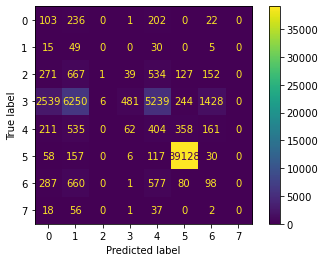

In [120]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

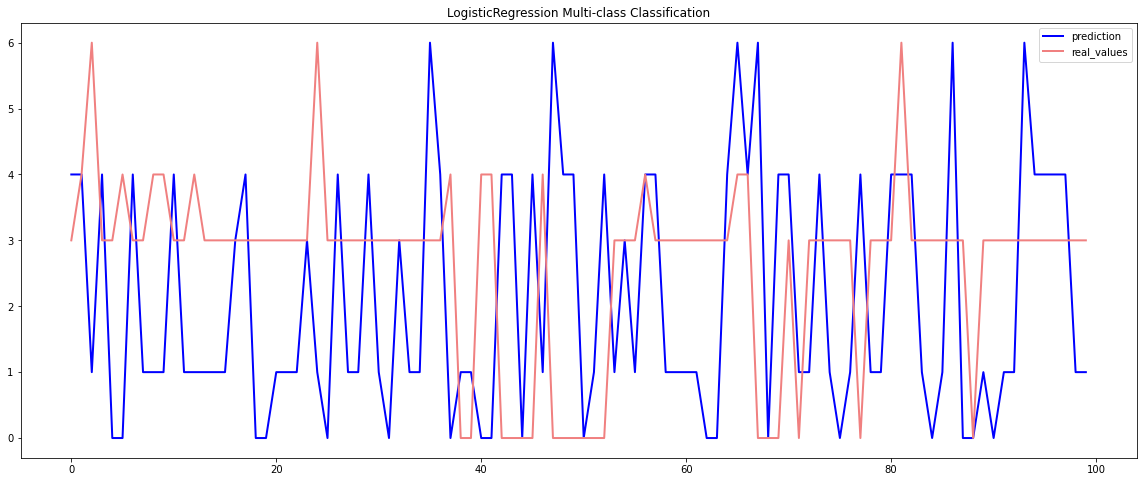

In [121]:
y_pred = model.predict(X_test)
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("LogisticRegression Multi-class Classification")
plt.show()

In [122]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#LogR_explainer = RegressionExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.Explainer(model, X_test)
dump(explainer, "./app/saves/multiclass/explainers/LogR_explainer.joblib")
dump(model, './app/saves/multiclass/models/LogR.joblib') 

['./app/saves/multiclass/models/LogR.joblib']

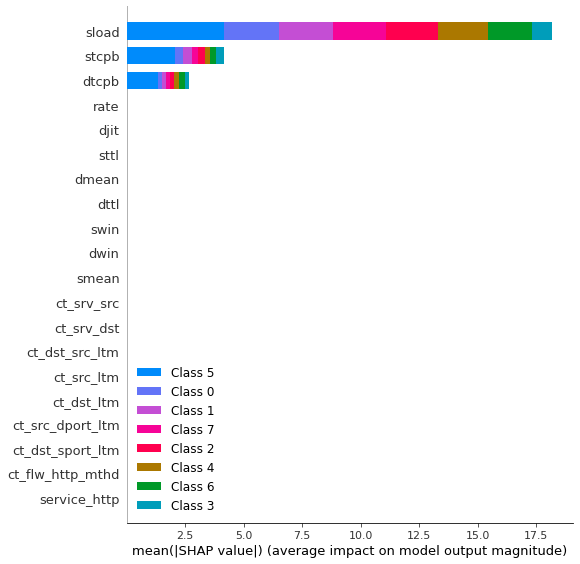

In [123]:
shap_values = explainer.shap_values(X_test[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [124]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_pred = model.predict(X_test)

[VALIDATE] Scores in every iteration [0.9007052  0.90038097 0.89713869 0.89154576 0.89997568]
Accuracy: 0.90 (+/- 0.01)


In [125]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred, average=None)

array([0.29201102, 0.00720165, 0.11963455, 0.36124503, 0.15784051,
       0.99460724, 0.11451682, 0.01547862])

In [126]:
from sklearn.metrics import recall_score
recall_score(Y_test, y_pred, average=None)

array([0.93971631, 0.07070707, 0.19374651, 0.23840119, 0.22125939,
       0.98997367, 0.15795655, 0.16666667])

In [127]:
from sklearn.metrics import precision_score
precision_score(Y_test,y_pred, average=None)

array([0.17286367, 0.00379404, 0.08653367, 0.74526844, 0.12267777,
       0.9992844 , 0.08981636, 0.00811619])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


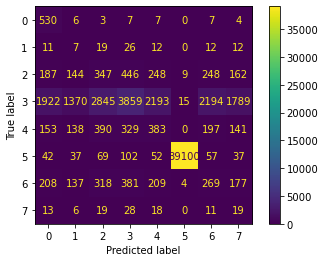

In [128]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

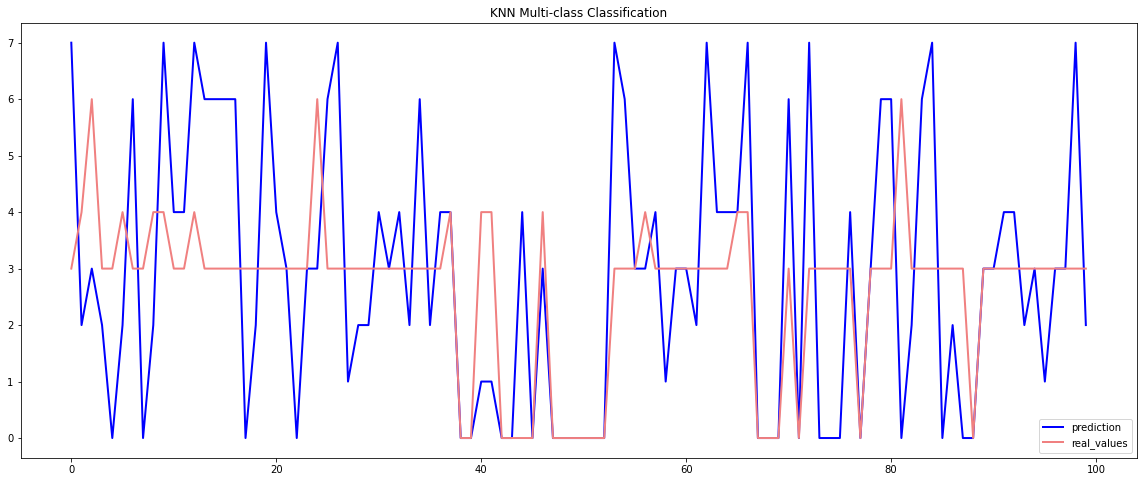

In [129]:
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("KNN Multi-class Classification")
plt.show()

In [130]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#XGB_explainer = ClassifierExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.KernelExplainer(model.predict_proba, shap.kmeans(X_train, 50))
dump(explainer, "./app/saves/multiclass/explainers/KNN_explainer.joblib")
dump(model, './app/saves/multiclass/models/KNN.joblib') 

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names


['./app/saves/multiclass/models/KNN.joblib']

  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To 

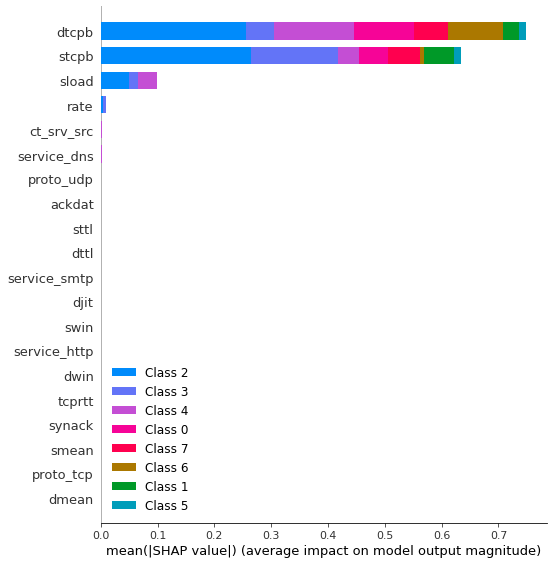

In [131]:
shap_values = explainer.shap_values(X_test[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [132]:
model = RandomForestClassifier(random_state=50)
model.fit(X_train,Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.9413958  0.93588393 0.9361271  0.93523547 0.94058523]
Accuracy: 0.94 (+/- 0.01)


In [133]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average=None)

array([0.67954134, 0.01941748, 0.3654902 , 0.8488448 , 0.77188873,
       0.9922286 , 0.61451788, 0.34482759])

In [134]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average=None)

array([0.99822695, 0.01010101, 0.39028476, 0.80348428, 0.76140959,
       0.9908092 , 0.83264827, 0.35087719])

In [135]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average=None)

array([0.51509607, 0.25      , 0.34365782, 0.8996334 , 0.78266033,
       0.99365208, 0.48695055, 0.33898305])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


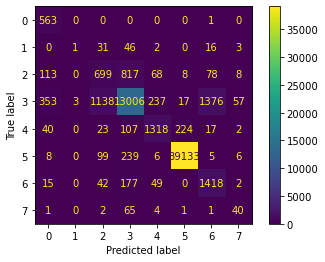

In [136]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

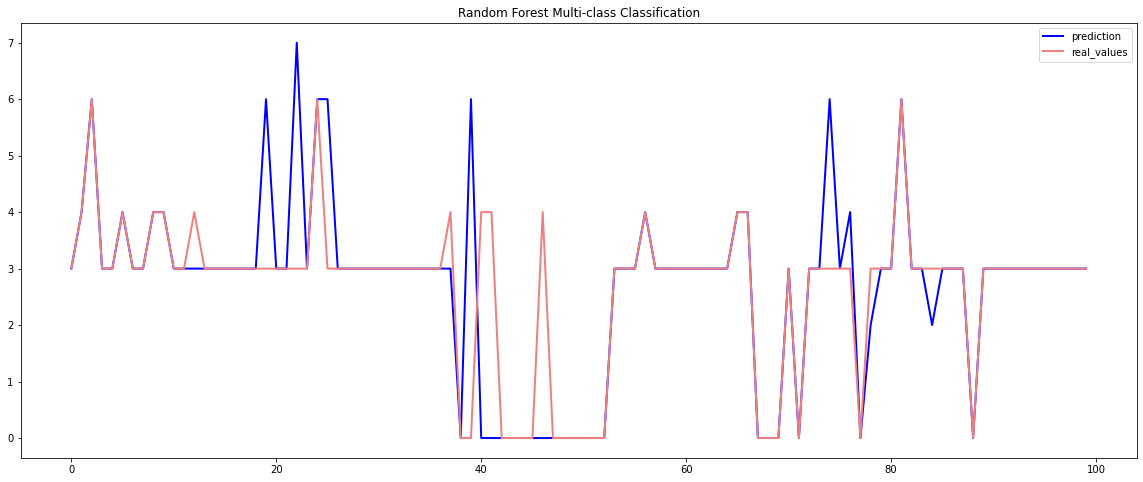

In [137]:
y_pred = model.predict(X_test)
plt.figure(figsize=(20,8))
plt.plot(y_pred[100:200], label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test[100:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("Random Forest Multi-class Classification")
plt.show()

In [138]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#XGB_explainer = ClassifierExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.TreeExplainer(model)
dump(explainer, "./app/saves/multiclass/explainers/RF_explainer.joblib")
dump(model, './app/saves/multiclass/models/RF.joblib') 

['./app/saves/multiclass/models/RF.joblib']

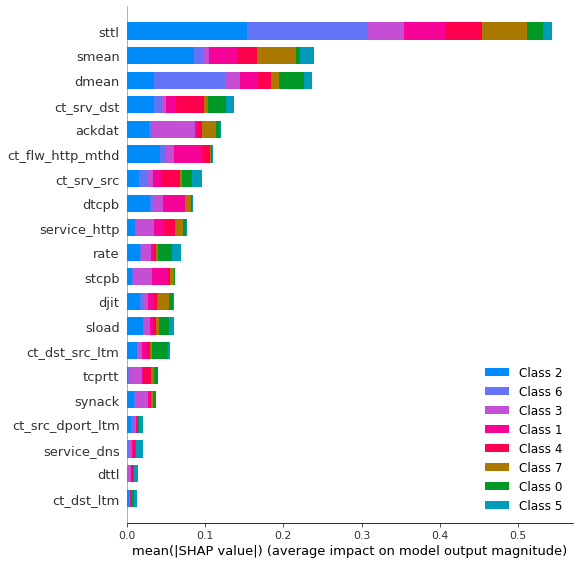

In [139]:
shap_values = explainer.shap_values(X_test[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [140]:
model = MLPClassifier(random_state=123, solver='adam', max_iter=8000)
model.fit(X_train, Y_train.values.ravel())
"""scores = cross_val_score(model, X_train, Y_train.values.ravel(), cv=cv)
print("[TRAIN] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
"""
scores = cross_val_score(model, X_test, Y_test.values.ravel(), cv=cv)
print("[VALIDATE] Scores in every iteration", scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[VALIDATE] Scores in every iteration [0.84996352 0.90265056 0.84639702 0.82216098 0.87501013]
Accuracy: 0.86 (+/- 0.05)


In [141]:
from sklearn.metrics import f1_score
f1_score(Y_test, model.predict(X_test), average=None)

array([0.0551255 , 0.        , 0.0687251 , 0.05816795, 0.28226155,
       0.99257774, 0.13773392, 0.        ])

In [142]:
from sklearn.metrics import recall_score
recall_score(Y_test, model.predict(X_test), average=None)

array([0.41666667, 0.        , 0.03852596, 0.03014765, 0.18890815,
       0.99037877, 0.59424545, 0.        ])

In [143]:
from sklearn.metrics import precision_score
precision_score(Y_test, model.predict(X_test), average=None)

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


array([0.0295152 , 0.        , 0.31797235, 0.82432432, 0.55802048,
       0.9947865 , 0.07789409, 0.        ])

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


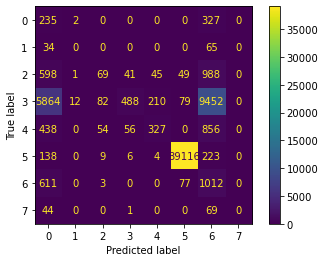

In [144]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,Y_test)

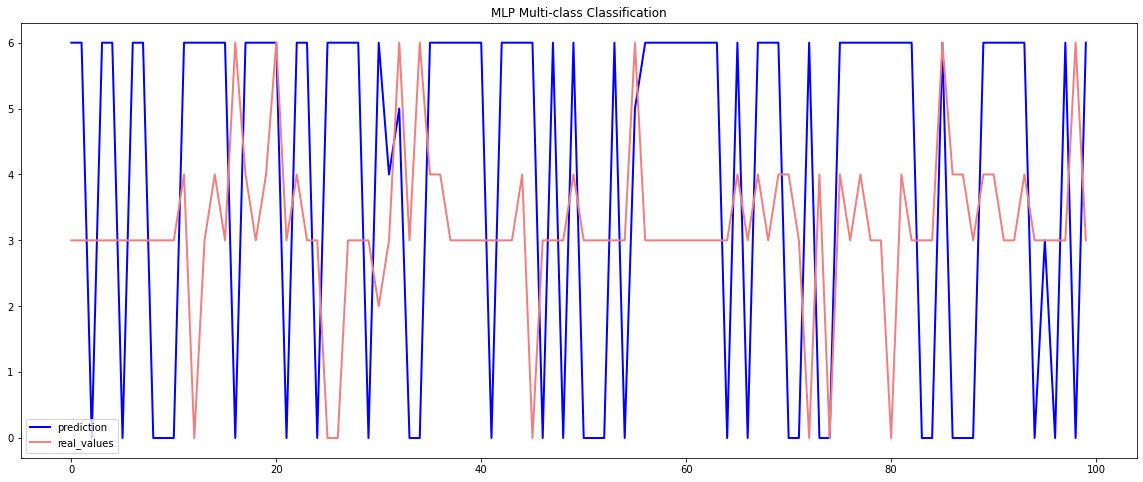

In [145]:
y_pred = model.predict(X_test)
plt.figure(figsize=(20,8))
plt.plot(y_pred[400:500], label="prediction", linewidth=2.0,color='blue')
plt.plot(Y_test[400:500].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.title("MLP Multi-class Classification")
plt.show()

In [146]:
#Guardar en variable para datasets final (Explainer explainerdashboard)
#MLP_explainer = ClassifierExplainer(model, X_test, Y_test)
#Guardar explainer y modelo para la app
explainer = shap.KernelExplainer(model.predict_proba,shap.kmeans(X_train, 50))
dump(explainer, "./app/saves/multiclass/explainers/MLP_explainer.joblib")
dump(model, './app/saves/multiclass/models/MLP.joblib') 

X does not have valid feature names, but MLPClassifier was fitted with feature names


['./app/saves/multiclass/models/MLP.joblib']

  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but MLPClassifier was fitted with feature names
X does not have valid feature names, but MLPClassifier was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the 

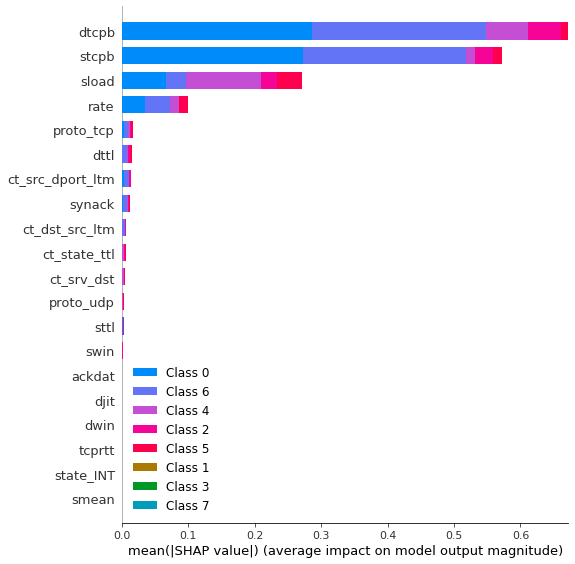

In [147]:
shap_values = explainer.shap_values(X_test[:1])
shap.summary_plot(shap_values, X_test, plot_type="bar")